In [13]:
def pad_2d_list(original_list, pad_to, padding_token):
    # Get the dimensions of the original list
    rows = len(original_list)
    cols = len(original_list[0]) if rows > 0 else 0

    # Create a new 50x50 list filled with -1
    padded_list = [[padding_token for _ in range(pad_to)] for _ in range(pad_to)]

    # Copy the original list into the padded list
    for i in range(min(rows, pad_to)):
        for j in range(min(cols, pad_to)):
            padded_list[i][j] = original_list[i][j]

    return padded_list

# Example usage
original = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

result = pad_2d_list(original, 50, -1)

# Print the result (optional)
for row in result:
    print(row)



import torch

padded_tensor = torch.tensor(
    [[[1, 2, 3, -1],
    [4, 5, 6, -1],
    [7, 8, 9, -1],
    [-1, -1, -1, -1]],

    [[1, 2, -1, -1],
    [4, 5, -1, -1],
    [7, 8, -1, -1],
    [-1, -1, -1, -1]]], dtype=torch.float32
)

def depad_2d(padded_tensor, padding_token=-1):
    depadded_list = []
    for sample in padded_tensor:
        sample_list = []
        for row in sample:
            # Convert to list and remove padding
            row_list = [val.item() for val in row if val != padding_token]
            if row_list:  # Only add non-empty rows
                sample_list.append(row_list)
        if sample_list:  # Only add non-empty samples
            depadded_list.append(sample_list)
    return depadded_list

depad_2d(padded_tensor)

[1, 2, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[4, 5, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[7, 8, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1,

[[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]],
 [[1.0, 2.0], [4.0, 5.0], [7.0, 8.0]]]

In [14]:
def pad_list_of_lists(original_list, target_length=100, padding_token=[-1, -1, -1, -1]):
    # Create a new list with the target length
    padded_list = original_list.copy()
    
    # Pad the list to the target length
    while len(padded_list) < target_length:
        padded_list.append(padding_token)
    
    return padded_list

# Example usage
original_data = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

padded_data = pad_list_of_lists(original_data)
print(padded_data)
print(len(padded_data))

padded_tensor = torch.tensor(
    [[[1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [-1, -1, -1, -1]],

    [[1, 2, 3, 4],
    [5, 6, 7, 8],
    [-1, -1, -1, -1],
    [-1, -1, -1, -1],
    [-1, -1, -1, -1]]], dtype=torch.float32
)

def depad(padded_tensor, padding_token=[-1, -1, -1, -1]):
    padding_token = torch.tensor(padding_token, dtype=padded_tensor.dtype)
    
    depadded_list = []
    for sample in padded_tensor:
        sample_list = []
        for row in sample:
            if not torch.equal(row, padding_token):
                sample_list.append(row.tolist())
        depadded_list.append(sample_list)
    
    return depadded_list

print(depad(padded_tensor))

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], 

In [3]:
import json

def extract_bboxes(data):
    bboxes = []
    for annotation in data['annotations']:
        bbox = annotation['bbox']
        bboxes.append(bbox)
    return bboxes

# Example usage
sample_data = {
    "filename": "PMC5451934_004_00.png",
    "image_id": 548842,
    "html": ["<thead>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "</thead>", "<tbody>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "</tbody>"],
    "annotations": [
        {
            "bbox": [46, 5, 43, 11],
            "category_id": 0,
            "area": 473
        },
        {
            "bbox": [146, 5, 64, 11],
            "category_id": 0,
            "area": 704
        },
        # Additional annotations...
    ]
}

bboxes = extract_bboxes(sample_data)
print(bboxes)

[[46, 5, 43, 11], [146, 5, 64, 11]]


In [3]:
import torch

# Function to convert (x0, y0, x1, y1) to (x0, y0, width, height)
def convert_to_width_height(boxes):
    # Convert from (top_left_x, top_left_y, bottom_right_x, bottom_right_y) 
    # to (top_left_x, top_left_y, width, height)
    x0, y0, x1, y1 = boxes.unbind(-1)
    width = x1 - x0
    height = y1 - y0
    return torch.stack((x0, y0, width, height), dim=-1)

# Sample results list with two entries (batch_size = 2)
results = [
    {'boxes': torch.tensor([[10, 20, 50, 30], [30, 40, 70, 80], [100, 120, 140, 150]])},  # For batch 1
    {'boxes': torch.tensor([[15, 25, 55, 65], [35, 45, 75, 85], [105, 125, 145, 165]])}   # For batch 2
]

# Convert and stack "boxes" values
boxes_list = [convert_to_width_height(d['boxes']) for d in results]
boxes_tensor = torch.stack(boxes_list)

# Output the result
print("Converted and Stacked Bounding Boxes Tensor:")
print(boxes_tensor)
print("Shape of the resulting tensor:", boxes_tensor.shape)


Converted and Stacked Bounding Boxes Tensor:
tensor([[[ 10,  20,  40,  10],
         [ 30,  40,  40,  40],
         [100, 120,  40,  30]],

        [[ 15,  25,  40,  40],
         [ 35,  45,  40,  40],
         [105, 125,  40,  40]]])
Shape of the resulting tensor: torch.Size([2, 3, 4])


i have a log-softmaxxed probability tensor of shape (batch_size, num_edges, num_classes) and a edge tensor of shape (batch_size, num_edges, 8). the 8 is because two bboxes (nodes) are of the format (left_corner_x, left_corner_y, width, height) and are concatenated together. i need a script to take these two inputs, the original image numpy (result of cv2.imread) and draw all bboxes on the image. i want to draw all edges too, with the color of a particular edge corresponding to the predicted class. there are 4 classes, with class 0 being transparent, class 1 being red, class 2 being blue and class 3 being green. help me to write that script and a small example to test it out. i will procure the image myself.

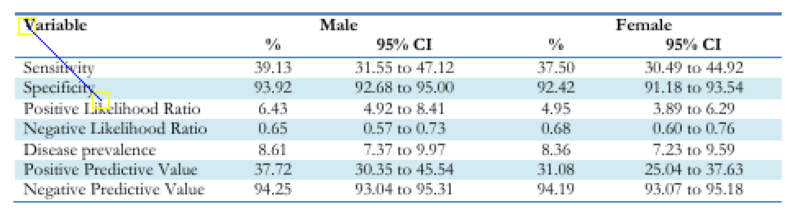

In [7]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

def draw_bboxes_and_edges(image, prob_tensor, edge_tensor, bbox_thickness=2, line_thickness=2):
    # Define the color mapping for the classes
    colors = {
        1: (0, 0, 255),   # Red
        2: (255, 0, 0),   # Blue
        3: (0, 255, 0)    # Green
    }

    batch_size, num_edges, num_classes = prob_tensor.shape

    # Ensure prob_tensor is in log-softmax format and get the predicted class per edge
    predicted_classes = torch.argmax(prob_tensor, dim=-1)

    for i in range(batch_size):
        for j in range(num_edges):
            # Extract the bounding boxes for the current edge
            bbox1 = edge_tensor[i, j, :4].cpu().numpy().astype(int)
            bbox2 = edge_tensor[i, j, 4:].cpu().numpy().astype(int)

            # Draw the bounding boxes on the image
            x1, y1, w1, h1 = bbox1
            x2, y2, w2, h2 = bbox2

            cv2.rectangle(image, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 255), bbox_thickness)
            cv2.rectangle(image, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 255), bbox_thickness)

            # Get the predicted class and corresponding color
            predicted_class = predicted_classes[i, j].item()
            if predicted_class == 0:
                continue  # Skip drawing for class 0

            color = colors[predicted_class]

            # Draw the edge as a line connecting the centers of the two bounding boxes
            center1 = (x1 + w1 // 2, y1 + h1 // 2)
            center2 = (x2 + w2 // 2, y2 + h2 // 2)
            cv2.line(image, center1, center2, color, line_thickness)

    return image

# Load an image using OpenCV (replace with your image path)
image = cv2.imread('PMC5402779_004_00.png')

# Example tensors
prob_tensor = torch.tensor([[[1.0, -2.0, -1.5, -3.0], [-2.0, 1.0, 1.5, -3.0]]])  # Shape: (1, 2, 4)
prob_tensor = torch.nn.functional.log_softmax(prob_tensor, dim=-1)
edge_tensor = torch.tensor([[[5, 5, 10, 10, 50, 50, 10, 10], 
                                [50, 50, 10,10, 5, 5, 10, 10]]])  # Shape: (1, 2, 8)

# Draw the bboxes and edges
output_image = draw_bboxes_and_edges(image, prob_tensor, edge_tensor, bbox_thickness=1, line_thickness=1)

# Convert BGR (OpenCV format) to RGB for displaying with matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the image in the notebook
plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.axis('off')  # Hide axes
plt.show()